In [24]:
import pandas as pd
df = pd.read_csv('../dados/shampoo.csv')
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)

In [25]:
df.head()

,Sales
Month,
2000-01-01,266.0
2000-02-01,145.9
2000-03-01,183.1
2000-04-01,119.3
2000-05-01,180.3


In [15]:
df['naive'] = df.Sales.shift(1)
df.head()

,Sales,naive
Month,,
2000-01-01,266.0,NaN
2000-02-01,145.9,266.0
2000-03-01,183.1,145.9
2000-04-01,119.3,183.1
2000-05-01,180.3,119.3


<Axes: xlabel='Month'>

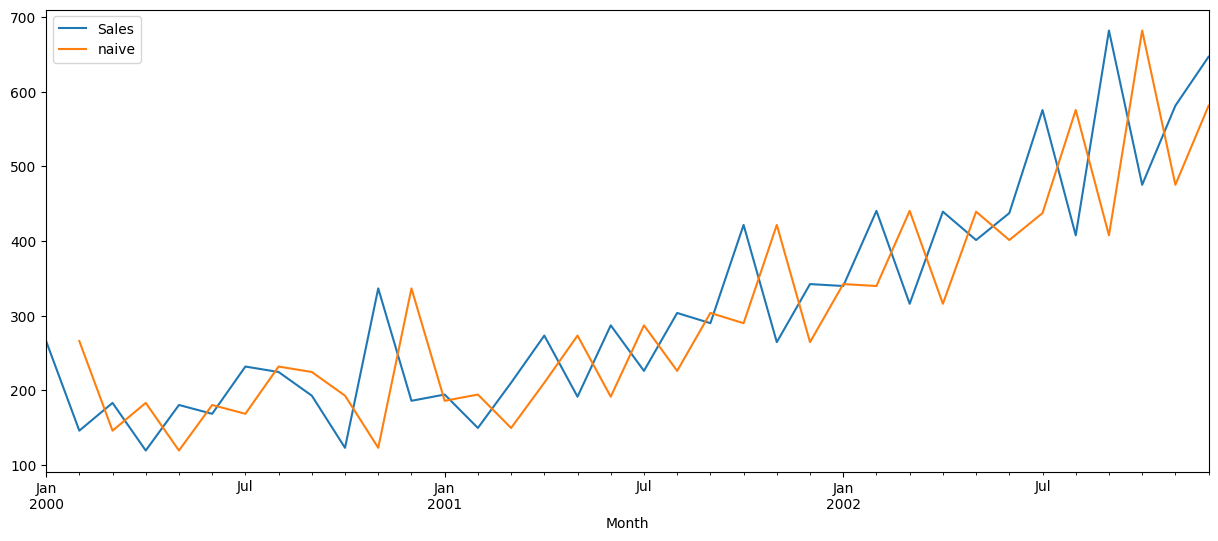

In [16]:
df.plot(figsize= (15,6))

In [18]:
erros = (df.Sales - df.naive)** 2

In [19]:
erros 

Month
2000-01-01         NaN
2000-02-01    14424.01
2000-03-01     1383.84
2000-04-01     4070.44
2000-05-01     3721.00
2000-06-01      139.24
2000-07-01     4006.89
2000-08-01       53.29
2000-09-01     1004.89
2000-10-01     4886.01
2000-11-01    45624.96
2000-12-01    22680.36
2001-01-01       70.56
2001-02-01     2007.04
2001-03-01     3672.36
2001-04-01     3994.24
2001-05-01     6707.61
2001-06-01     9139.36
2001-07-01     3721.00
2001-08-01     6021.76
2001-09-01      187.69
2001-10-01    17344.89
2001-11-01    24680.41
2001-12-01     6052.84
2002-01-01        6.76
2002-02-01    10140.49
2002-03-01    15500.25
2002-04-01    15227.56
2002-05-01     1444.00
2002-06-01     1303.21
2002-07-01    19071.61
2002-08-01    28190.41
2002-09-01    75295.36
2002-10-01    42724.89
2002-11-01    11236.00
2002-12-01     4303.36
dtype: float64

In [29]:
import pandas as pd
df = pd.read_csv('../dados/shampoo.csv')
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)

In [30]:
df['x1'] = df.Sales.shift(1)
df.dropna(axis= 0, inplace = True)
df.head()

,Sales,x1
Month,,
2000-02-01,145.9,266.0
2000-03-01,183.1,145.9
2000-04-01,119.3,183.1
2000-05-01,180.3,119.3
2000-06-01,168.5,180.3


In [34]:
import matplotlib.pyplot as plt

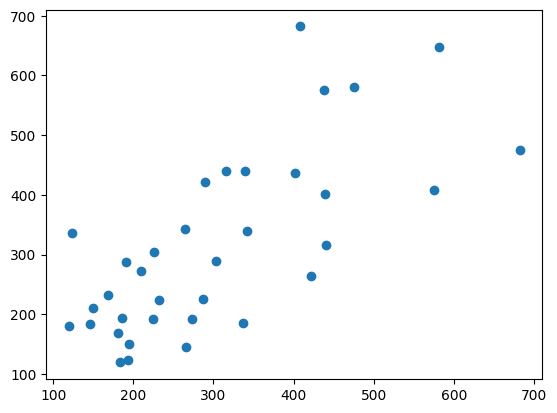

In [35]:
plt.scatter(df.x1, df.Sales)

In [36]:
from sklearn.linear_model import LinearRegression

X = df.x1.values
y = df.Sales.values

reg = LinearRegression().fit(X.reshape(-1, 1), y)
previsoes = reg.predict(X.reshape(-1, 1))

In [37]:
((y-previsoes) ** 2).mean()

10668.73613429366

Text(0, 0.5, 'Sales')

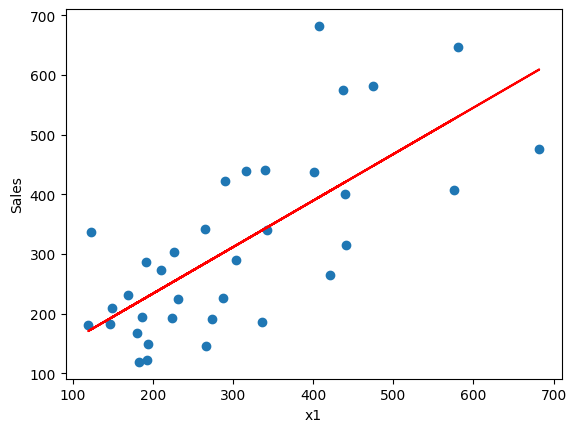

In [39]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X.reshape(-1, 1)), color = 'red')
plt.xlabel('x1')
plt.ylabel('Sales')

In [40]:
df['ar_1'] =  previsoes
df.head()

,Sales,x1,ar_1
Month,,,
2000-02-01,145.9,266.0,285.093703
2000-03-01,183.1,145.9,191.610723
2000-04-01,119.3,183.1,220.566317
2000-05-01,180.3,119.3,170.905917
2000-06-01,168.5,180.3,218.386864


<Axes: xlabel='Month'>

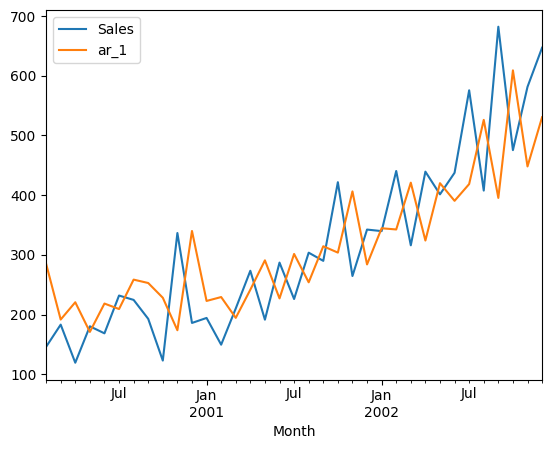

In [41]:
df[['Sales', 'ar_1']].plot()

In [46]:
from statsmodels.tsa.ar_model import AutoReg

ar_2 = AutoReg(df.Sales, lags = 'MS').fit(2)


c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


TypeError: lags must be integer_like (int or np.integer, but not bool or timedelta64)